In [232]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.tree import export_graphviz
from IPython.display import Image  
from pydotplus import graph_from_dot_data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [233]:
df = pd.read_csv("/Users/schlinkertc/Flatiron/projects/classification/files/data.csv",index_col='cik')
df['manufacturing'] = df['sic'].map(lambda x: 3000<x<4000)
df.drop(columns='sic',inplace=True)

In [234]:
df['Liabilities'] = df['LiabilitiesAndStockholdersEquity']-df['StockholdersEquity']

In [235]:
X=df.drop(columns=['adsh','manufacturing'])
y=df['manufacturing']

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=.2,random_state=10)

### Base Estimator

In [236]:
from sklearn.base import BaseEstimator

In [237]:
class Not_class(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1), dtype=bool)
        

In [317]:
not_manufacturing = Not_class()
cross_val_score(not_manufacturing,X_train,y_train,cv=3,scoring='accuracy')

array([0.79379921, 0.80068898, 0.82028557])

In [322]:
base_predictions = not_manufacturing.predict(X_test)
f1_score(y_test,base_predictions)

//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

## SGD

In [239]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=12)
sgd_clf.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=12, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [240]:
sgd_y_pred = sgd_clf.predict(X_test)

In [241]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train, y_train,cv=4,scoring='accuracy')

array([0.80262295, 0.72506562, 0.69730794, 0.62048588])

### Confusion Matrix

In [242]:
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler

scaler =StandardScaler()

y_train_pred = cross_val_predict(sgd_clf, scaler.fit_transform(X_train), y_train, cv=3)

In [243]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,y_train_pred)

array([[4854,   52],
       [1185,    4]])

### Precision and Recall

In [244]:
from sklearn.metrics import precision_score, recall_score, f1_score,precision_recall_curve
print(precision_score(y_test,sgd_y_pred))
print(recall_score(y_test,sgd_y_pred))
print(f1_score(y_test,sgd_y_pred))

0.0
0.0
0.0


SGD makes it's decisions based on a score determined by a decision function. 

In [319]:
sgd_clf.loss_function_

In [245]:
y_scores = sgd_clf.decision_function(X_train)
y_scores

array([-1.04022116e+19, -4.08883757e+20, -7.72578896e+18, ...,
       -4.50197072e+18, -1.31964149e+18, -6.73377892e+20])

In [246]:
precisions, recalls, thresholds = precision_recall_curve(y_train,y_scores)

In [247]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],"b--",label='Precision')
    plt.plot(thresholds,recalls[:-1], 'g-',label='Recall')
    plt.xlabel('Threshold')
    plt.legend(loc='center left')
    plt.ylim([0,1])

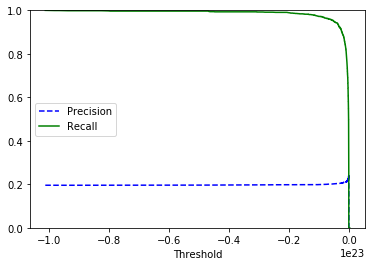

In [248]:
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

In [249]:
from sklearn.metrics import roc_curve

fpr,tpr,thresholds = roc_curve(y_train,y_scores)

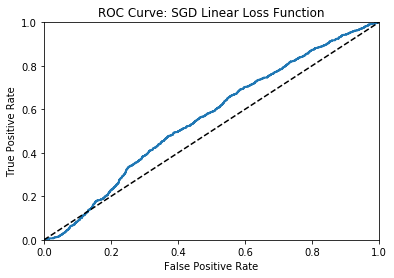

In [320]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr,tpr)
plt.title('ROC Curve: SGD Linear Loss Function')
plt.show()

In [251]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train,y_scores)
f1_score()

0.5585054534071495

### Random Forest

In [252]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=12)

y_probas_forest = cross_val_predict(forest_clf, X_train, y_train, cv=3,
                                   method='predict_proba')

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [324]:
forest_clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=12, verbose=0,
                       warm_start=False)

In [253]:
y_scores_forest = y_probas_forest[:,1] # probability of a positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train,y_scores_forest)

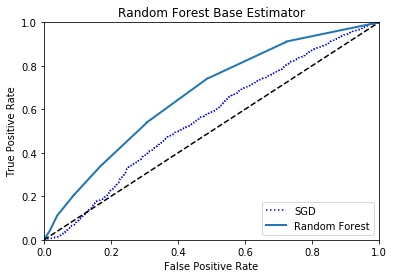

In [325]:
plt.plot(fpr,tpr,'b:',label='SGD')
plot_roc_curve(fpr_forest,tpr_forest,"Random Forest")
plt.legend(loc="lower right")
plt.title('Random Forest Base Estimator')
plt.show()

In [329]:
forest_clf.fit(X_train,y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=12, verbose=0,
                       warm_start=False)

In [330]:
confusion_matrix(y_test,forest_clf.predict(X_test))

array([[1168,   52],
       [ 269,   35]])

In [335]:

print(precision_score(y_test,forest_clf.predict(X_test)))
print(recall_score(y_test,forest_clf.predict(X_test)))
print(f1_score(y_test,forest_clf.predict(X_test)))

0.40229885057471265
0.11513157894736842
0.17902813299232737


# Tuning 

## Random Search

In [255]:
forest_clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=12, verbose=0,
                       warm_start=False)

In [256]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [257]:
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = forest_clf, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 3, 
                               verbose=2, 
                               random_state=12, 
                               n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   40.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  9.3min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [258]:
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 60,
 'bootstrap': True}

In [259]:
best_random = rf_random.best_estimator_

In [260]:
best_rf_random_preds = best_random.predict(X_test)

In [261]:
best_rf_random_probas = cross_val_predict(best_random, X_train, y_train, cv=3,
                                   method='predict_proba')

In [262]:
y_scores_best_forest_random = best_rf_random_probas[:,1] # probability of a positive class
best_random_fpr_forest, best_random_tpr_forest, best_random_thresholds_forest = roc_curve(y_train,y_scores_best_forest_random)

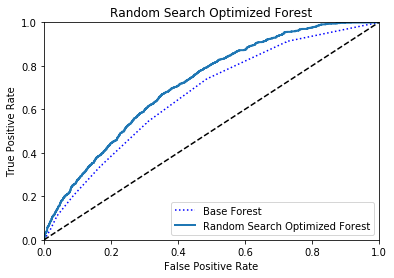

In [336]:
plt.plot(fpr_forest,tpr_forest,'b:',label='Base Forest')
plot_roc_curve(best_random_fpr_forest,best_random_tpr_forest,"Random Search Optimized Forest")
plt.legend(loc="lower right")
plt.title('Random Search Optimized Forest')
plt.show()

In [340]:
print('Precision: ',precision_score(y_test,best_rf_random_preds))
print('Recall: ',recall_score(y_test,best_rf_random_preds))
print('F1: ',f1_score(y_test,best_rf_random_preds))

Precision:  0.6785714285714286
Recall:  0.0625
F1:  0.1144578313253012


## Grid Search

In [264]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
gs_param_grid = {
    'bootstrap': [True],
    'max_depth': [40, 50, 60],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3, 4],
    'n_estimators': [1000, 1200, 1400]
}


grid_search = GridSearchCV(estimator = forest_clf, param_grid = gs_param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [265]:
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 38.2min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 50.3min
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed: 73.6min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=12,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bo

In [266]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 40,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 1200}

In [267]:
best_grid = grid_search.best_estimator_

In [268]:
best_rf_grid_probas = cross_val_predict(best_grid, X_train, y_train, cv=3,
                                   method='predict_proba')

In [269]:
y_scores_best_forest_grid = best_rf_grid_probas[:,1] # probability of a positive class
best_grid_fpr_forest, best_grid_tpr_forest, best_grid_thresholds_forest = roc_curve(y_train,y_scores_best_forest_grid)

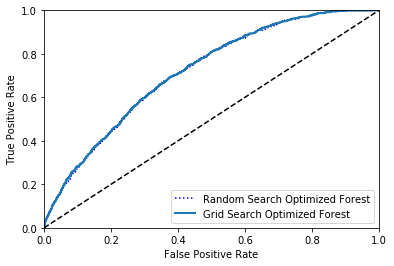

In [270]:
plt.plot(best_random_fpr_forest,best_random_tpr_forest,'b:',label='Random Search Optimized Forest')
plot_roc_curve(best_grid_fpr_forest,best_grid_tpr_forest,"Grid Search Optimized Forest")
plt.legend(loc="lower right")
plt.show()

## Confusion Matrix

In [312]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap,aspect='auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [313]:
best_grid_preds = best_grid.predict(X_test)

In [314]:
cm = confusion_matrix(y_test,best_grid_preds)
classes = ['Non-Manufacturing', 'Manufacturing']

Confusion Matrix, without normalization
[[1205   15]
 [ 285   19]]


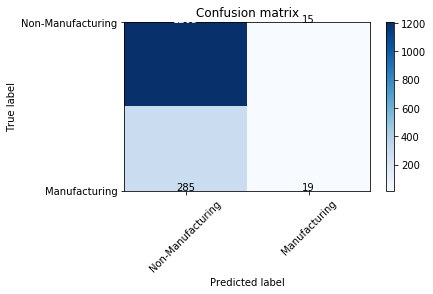

In [315]:
import itertools
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)